# Import Packages and Dataset

## Packages

In [1]:
!pip install transformers

     |████████████████████████████████| 573kB 6.1MB/s 
     |████████████████████████████████| 3.7MB 9.8MB/s 
     |████████████████████████████████| 1.0MB 17.6MB/s 
     |████████████████████████████████| 890kB 28.8MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.41-cp36-none-any.whl size=893334 sha256=dc77e02bc569b2a27361b2d05c1ffc6b6a716d9457c066ba8d68ce5e6aaba791
  Stored in directory: /root/.cache/pip/wheels/22/5a/d4/b020a81249de7dc63758a34222feaa668dbe8ebfe9170cc9b1
Successfully built sacremoses


In [0]:
%tensorflow_version 2.x

In [3]:
import torch
import transformers as tfm # pytorch transformers
from sklearn.linear_model import LogisticRegression

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import InputLayer

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,hamming_loss

from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from tqdm import tqdm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Dataset

In [4]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
train_path = '/content/gdrive/My Drive/Colab Notebooks/Tugas Akhir/Data/data_train_nostemstop_preprocessed.csv'

data_train = pd.read_csv(train_path,sep=";")

In [6]:
data_train.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Tweet_Parsed
0,- kdg will be kind enough to show you how to l...,0,1,0,0,0,0,0,0,0,0,0,0,kadang will be kind enough to show you how to...
1,Ternyata komunis juga bisa nangis',0,0,0,0,0,0,0,0,0,0,0,0,ternyata komunis juga bisa menangis
2,USER USER Kenapa harus bom ya? Kek yg benar nu...,0,0,0,0,0,0,0,0,0,0,0,0,user user kenapa harus bom seperti benar men...
3,USER Sumpaaah kaya kalo abis IAA dilanjut olim...,0,0,0,0,0,0,0,0,0,0,0,0,user sumpah kaya kalau habis iya dilanjut olim...
4,RT USER USER USER USER USER fungsi media sosia...,1,0,1,0,0,0,0,0,1,1,0,0,rt user user user user user fungsi media sosia...


In [0]:
test_path = '/content/gdrive/My Drive/Colab Notebooks/Tugas Akhir/Data/data_test_nostemstop_preprocessed.csv'

data_test = pd.read_csv(test_path,sep=";")

In [8]:
data_test.head()

,Index,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Tweet_Parsed
0,1,GANTENG TAPI BERENGSEK!!! BUAT APA?!!\nWHO DO ...,1,1,1,0,0,0,0,0,1,1,0,0,ganteng tapi berengsek buat apa who do you thi...
1,2,Sakit jiwa kali yah..,0,0,0,0,0,0,0,0,0,0,0,0,sakit jiwa kali
2,3,"Does insulting one for being ""Cina"", ""Kafir"", ...",0,1,0,0,0,0,0,0,0,0,0,0,does insulting one for being cina kafir make y...
3,4,USER USER Karena partaimu pdip itu bajingan',1,1,0,1,0,0,0,0,1,0,1,0,user user karena partaimu partai demokrasi ind...
4,5,USER USER Jgn salah itu janji jokowi yg di tun...,1,1,1,0,0,0,0,0,1,1,0,0,user user jangan salah itu janji jokowi di tu...


In [0]:
val_path = '/content/gdrive/My Drive/Colab Notebooks/Tugas Akhir/Data/data_val_nostemstop_preprocessed.csv'

data_val = pd.read_csv(val_path,sep=";")

In [10]:
data_val.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Tweet_Parsed
0,So much berengsek people in the world,1,1,0,1,0,0,0,0,1,0,1,0,so much berengsek people in the world
1,"So, how can I get my REKBER?? rekening berengsek.",0,1,0,0,0,0,0,0,0,0,0,0,so how can i get my rekening berengsek rekenin...
2,RT USER: dasar bajingan!\xf0\x9f\x98\xa0 URL,0,1,0,0,0,0,0,0,0,0,0,0,rt user dasar bajingan url
3,USER Krn cebong tdk akn mengakui pria lajang y...,1,1,0,1,0,0,0,0,1,0,1,0,user karena kecebong tidak akan mengakui pria ...
4,"RT USER: ga ada urusannya, monyet. gua broken ...",1,1,1,0,0,0,0,0,1,1,0,0,rt user tidak ada urusannya monyet aku broken ...


# Features Target Split

In [0]:
X_train = data_train['Tweet_Parsed']
y_train = data_train.drop(['Tweet','Tweet_Parsed'],axis=1).values

X_val = data_val['Tweet_Parsed']
y_val = data_val.drop(['Tweet','Tweet_Parsed'],axis=1).values

X_test = data_test['Tweet_Parsed']
y_test = data_test.drop(['Tweet','Tweet_Parsed','Index'],axis=1).values

# BERT Model

In [0]:
model_class, tokenizer_class, pretrained_weights = (tfm.BertModel, tfm.BertTokenizer, 'bert-base-multilingual-cased')

## Load Tokenizer and Model

In [0]:
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

## Tokenize Train Set, Validation Set, and Test Set

In [0]:
train_sequences = X_train.apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [0]:
validation_sequences = X_val.apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [0]:
test_sequences = X_test.apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [0]:
train_padded = sequence.pad_sequences(train_sequences, maxlen=100, padding="post", truncating="post")

In [0]:
validation_padded = sequence.pad_sequences(validation_sequences, maxlen=100, padding="post", truncating="post")

In [0]:
test_padded = sequence.pad_sequences(test_sequences, maxlen=100, padding="post", truncating="post")

## Change Padded to Tensor and Run Model (Forward Pass)

In [0]:
import pickle

In [0]:
train_ids = torch.tensor(np.array(train_padded)).to(torch.int64)
train_features = []
batch_size = 500
for batch in tqdm(range(0,len(train_ids),batch_size)):
  with torch.no_grad():
    train_last_hidden_states = model(train_ids[batch:batch+batch_size])
    train_features.append(train_last_hidden_states[0])
# train_features = train_features.numpy()

100%|██████████| 27/27 [35:07<00:00, 78.05s/it]


In [0]:
train_features = np.concatenate(train_features)

In [0]:
with open('/content/gdrive/My Drive/Colab Notebooks/Tugas Akhir/Bert Data/bert_train_nostemstop_3d.pkl', 'wb') as f:
  pickle.dump(train_features, f)

with open('/content/gdrive/My Drive/Colab Notebooks/Tugas Akhir/Bert Data/bert_y_train_nostemstop_3d.pkl', 'wb') as f:
  pickle.dump(y_train, f)

In [0]:
validation_ids = torch.tensor(np.array(validation_padded)).to(torch.int64)
validation_features = []
batch_size = 500
for batch in tqdm(range(0,len(validation_ids),batch_size)):
  with torch.no_grad():
    validation_last_hidden_states = model(validation_ids[batch:batch+batch_size])
    validation_features.append(validation_last_hidden_states[0])

100%|██████████| 3/3 [04:02<00:00, 80.85s/it]


In [0]:
validation_features = np.concatenate(validation_features)

In [0]:
with open('/content/gdrive/My Drive/Colab Notebooks/Tugas Akhir/Bert Data/bert_validation_nostemstop_3d.pkl', 'wb') as f:
  pickle.dump(validation_features, f)

with open('/content/gdrive/My Drive/Colab Notebooks/Tugas Akhir/Bert Data/bert_y_validation_nostemstop_3d.pkl', 'wb') as f:
  pickle.dump(y_val, f)

In [0]:
test_ids = torch.tensor(np.array(test_padded)).to(torch.int64)
test_features = []
batch_size = 500
for batch in tqdm(range(0,len(test_ids),batch_size)):
  with torch.no_grad():
    test_last_hidden_states = model(test_ids[batch:batch+batch_size])
    test_features.append(test_last_hidden_states[0])

100%|██████████| 8/8 [09:40<00:00, 72.58s/it]


In [0]:
test_features = np.concatenate(test_features)

In [0]:
with open('/content/gdrive/My Drive/Colab Notebooks/Tugas Akhir/Bert Data/bert_test_nostemstop_3d.pkl', 'wb') as f:
  pickle.dump(test_features, f)

with open('/content/gdrive/My Drive/Colab Notebooks/Tugas Akhir/Bert Data/bert_y_test_nostemstop_3d.pkl', 'wb') as f:
  pickle.dump(y_test, f)

In [0]:
train_features.shape

(13244, 100, 768)

In [0]:
validation_features.shape

(1472, 100, 768)

In [0]:
test_features.shape

(3680, 100, 768)

In [0]:
while 1:
  print("",end="")

KeyboardInterrupt: ignored

# Classification

In [0]:
with open('/content/gdrive/My Drive/Colab Notebooks/Tugas Akhir/Bert Data/bert_train_nostemstop_3d.pkl', 'rb') as f:
  train_features = pickle.load(f)

with open('/content/gdrive/My Drive/Colab Notebooks/Tugas Akhir/Bert Data/bert_y_train_nostemstop_3d.pkl', 'rb') as f:
  y_train = pickle.load(f)

In [0]:
with open('/content/gdrive/My Drive/Colab Notebooks/Tugas Akhir/Bert Data/bert_validation_nostemstop_3d.pkl', 'rb') as f:
  validation_features = pickle.load(f)

with open('/content/gdrive/My Drive/Colab Notebooks/Tugas Akhir/Bert Data/bert_y_validation_nostemstop_3d.pkl', 'rb') as f:
  y_validation = pickle.load(f)

In [0]:
with open('/content/gdrive/My Drive/Colab Notebooks/Tugas Akhir/Bert Data/bert_test_nostemstop_3d.pkl', 'rb') as f:
  test_features = pickle.load(f)

with open('/content/gdrive/My Drive/Colab Notebooks/Tugas Akhir/Bert Data/bert_y_test_nostemstop_3d.pkl', 'rb') as f:
  y_test = pickle.load(f)

## Define Model

In [0]:
model = Sequential()
# Configuring the parameters
model.add(InputLayer((100,768)))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(64, activation="relu"))
model.add(Dense(12, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 128)               426496    
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 12)                780       
Total params: 435,532
Trainable params: 435,532
Non-trainable params: 0
_________________________________________________________________


## Training Model with Adam Optimizer

In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(train_features, y_train, 
                    validation_data=(validation_features, y_val),
                    epochs=15, batch_size=32, 
                    verbose=2)

Epoch 1/15
414/414 - 17s - loss: 0.3571 - accuracy: 0.5517 - val_loss: 0.3277 - val_accuracy: 0.6270
Epoch 2/15
414/414 - 14s - loss: 0.3079 - accuracy: 0.5416 - val_loss: 0.3056 - val_accuracy: 0.4891
Epoch 3/15
414/414 - 14s - loss: 0.2862 - accuracy: 0.5123 - val_loss: 0.2909 - val_accuracy: 0.4694
Epoch 4/15
414/414 - 14s - loss: 0.2695 - accuracy: 0.4891 - val_loss: 0.2848 - val_accuracy: 0.3587
Epoch 5/15
414/414 - 14s - loss: 0.2539 - accuracy: 0.4662 - val_loss: 0.2829 - val_accuracy: 0.5537
Epoch 6/15
414/414 - 14s - loss: 0.2418 - accuracy: 0.4604 - val_loss: 0.2803 - val_accuracy: 0.4355
Epoch 7/15
414/414 - 14s - loss: 0.2292 - accuracy: 0.4455 - val_loss: 0.2789 - val_accuracy: 0.5462
Epoch 8/15
414/414 - 14s - loss: 0.2172 - accuracy: 0.4525 - val_loss: 0.2771 - val_accuracy: 0.3431
Epoch 9/15
414/414 - 14s - loss: 0.2045 - accuracy: 0.4589 - val_loss: 0.2826 - val_accuracy: 0.4980
Epoch 10/15
414/414 - 14s - loss: 0.1934 - accuracy: 0.4497 - val_loss: 0.2898 - val_accura

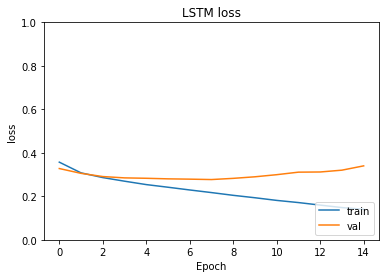

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.ylim(0,1)
plt.legend(['train', 'val'], loc='lower right')
plt.show()

## Predict and Result

In [0]:
predict = model.predict(test_features)
predict_train = model.predict(train_features)
predict_val = model.predict(validation_features)
thresholds=0.5

In [0]:
def labelSetAccuracy(y_true, y_pred):
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
#         print('\nset_true: {0}'.format(set_true))
#         print('set_pred: {0}'.format(set_pred))
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/\
                    float( len(set_true.union(set_pred)) )
        #print('tmp_a: {0}'.format(tmp_a))
        acc_list.append(tmp_a)
    return np.mean(acc_list)

In [21]:
pred_test = predict.copy()
pred_test[pred_test>=0.5] = 1
pred_test[pred_test<0.5] = 0
acc = accuracy_score(y_test,pred_test)
haml_loss = hamming_loss(y_test,pred_test)
label_acc = labelSetAccuracy(y_test,pred_test)
print("threshold = ",thresholds)
print("exact accuracy = ", acc)
print("hamming loss = ",haml_loss)
print("label based accuracy = ",label_acc)
print("==============================")

threshold =  0.5
exact accuracy =  0.5442934782608696
hamming loss =  0.11730072463768115
label based accuracy =  0.6480688190131124


In [22]:
accuracy_score([i[0] for i in y_test],[i[0] for i in pred_test])

0.7695652173913043

In [0]:
pred_train = predict_train.copy()
pred_train[pred_train>=0.5] = 1
pred_train[pred_train<0.5] = 0
acc = accuracy_score(y_train,pred_train)
haml_loss = hamming_loss(y_train,pred_train)
label_acc = labelSetAccuracy(y_train,pred_train)
print("threshold = ",thresholds)
print("exact accuracy = ", acc)
print("hamming loss = ",haml_loss)
print("label based accuracy = ",label_acc)
print("==============================")


threshold =  0.5
exact accuracy =  0.729613409845968
hamming loss =  0.04707162992046713
label based accuracy =  0.8384117336152219


In [0]:
pred_val = predict_val.copy()
pred_val[pred_val>=0.5] = 1
pred_val[pred_val<0.5] = 0
acc = accuracy_score(y_val,pred_val)
haml_loss = hamming_loss(y_val,pred_val)
label_acc = labelSetAccuracy(y_val,pred_val)
print("threshold = ",thresholds)
print("exact accuracy = ", acc)
print("hamming loss = ",haml_loss)
print("label based accuracy = ",label_acc)
print("==============================")


threshold =  0.5
exact accuracy =  0.5387228260869565
hamming loss =  0.1183197463768116
label based accuracy =  0.6474880305383023


## Save Model

In [0]:
model.save('/content/gdrive/My Drive/Colab Notebooks/Tugas Akhir/Model/modelBERT_nostemstop.h5')

In [0]:
from tensorflow.keras.models import load_model
model = load_model('/content/gdrive/My Drive/Colab Notebooks/Tugas Akhir/Model/modelBERT_nostemstop.h5')

# Analysis Predict

In [0]:
target = data_train.columns[1:-1]

## Data Validation Predict Analysis

In [0]:
data_val = pd.DataFrame(data=X_val,columns=['Tweet_Parsed']).reset_index(drop=True).join(pd.DataFrame(y_val,columns=target)).reset_index(drop=True)

In [0]:
data_val.head()

,Tweet_Parsed,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,so much berengsek people in the world,1,1,0,1,0,0,0,0,1,0,1,0
1,so how can i get my rekening berengsek rekenin...,0,1,0,0,0,0,0,0,0,0,0,0
2,rt user dasar bajingan url,0,1,0,0,0,0,0,0,0,0,0,0
3,user karena kecebong tidak akan mengakui pria ...,1,1,0,1,0,0,0,0,1,0,1,0
4,rt user tidak ada urusannya monyet aku broken ...,1,1,1,0,0,0,0,0,1,1,0,0


In [0]:
data_val_predict = pd.DataFrame(data=X_val,columns=['Tweet_Parsed']).reset_index(drop=True).join(pd.DataFrame(data=pred_val, columns=target))

In [0]:
data_val_predict.head()

,Tweet_Parsed,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,so much berengsek people in the world,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,so how can i get my rekening berengsek rekenin...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,rt user dasar bajingan url,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,user karena kecebong tidak akan mengakui pria ...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,rt user tidak ada urusannya monyet aku broken ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Check Number of Label on Predict Data

In [0]:
label_size0_val = []
label_size1_val = []

for i in data_val.columns[1:]:
    label_size0_val.append(len(data_val[data_val[i]==0]))
    label_size1_val.append(len(data_val[data_val[i]==1]))

label_size0_val_predict = []
label_size1_val_predict = []

for i in data_val_predict.columns[1:]:
    label_size0_val_predict.append(len(data_val_predict[data_val_predict[i]==0]))
    label_size1_val_predict.append(len(data_val_predict[data_val_predict[i]==1]))

In [0]:
dat_anls_val = pd.DataFrame({
    'label' : data_val.columns[1:],
    'stats' : ["negative" for i in range(len(data_val.columns[1:]))],
    'jumlah' : label_size0_val
}).append(
    pd.DataFrame({
        'label' : data_val.columns[1:],
        'stats' : ["positive" for i in range(len(data_val.columns[1:]))],
        'jumlah' : label_size1_val
    })
)

# dat_anls_val = dat_anls_val.set_index(['label'], drop=True)

dat_anls_val_predict = pd.DataFrame({
    'label' : data_val_predict.columns[1:],
    'stats' : ["negative" for i in range(len(data_val_predict.columns[1:]))],
    'jumlah' : label_size0_val_predict
}).append(
    pd.DataFrame({
        'label' : data_val_predict.columns[1:],
        'stats' : ["positive" for i in range(len(data_val_predict.columns[1:]))],
        'jumlah' : label_size1_val_predict
    })
)

# dat_anls_val_predict = dat_anls_val_predict.set_index(['label'], drop=True)

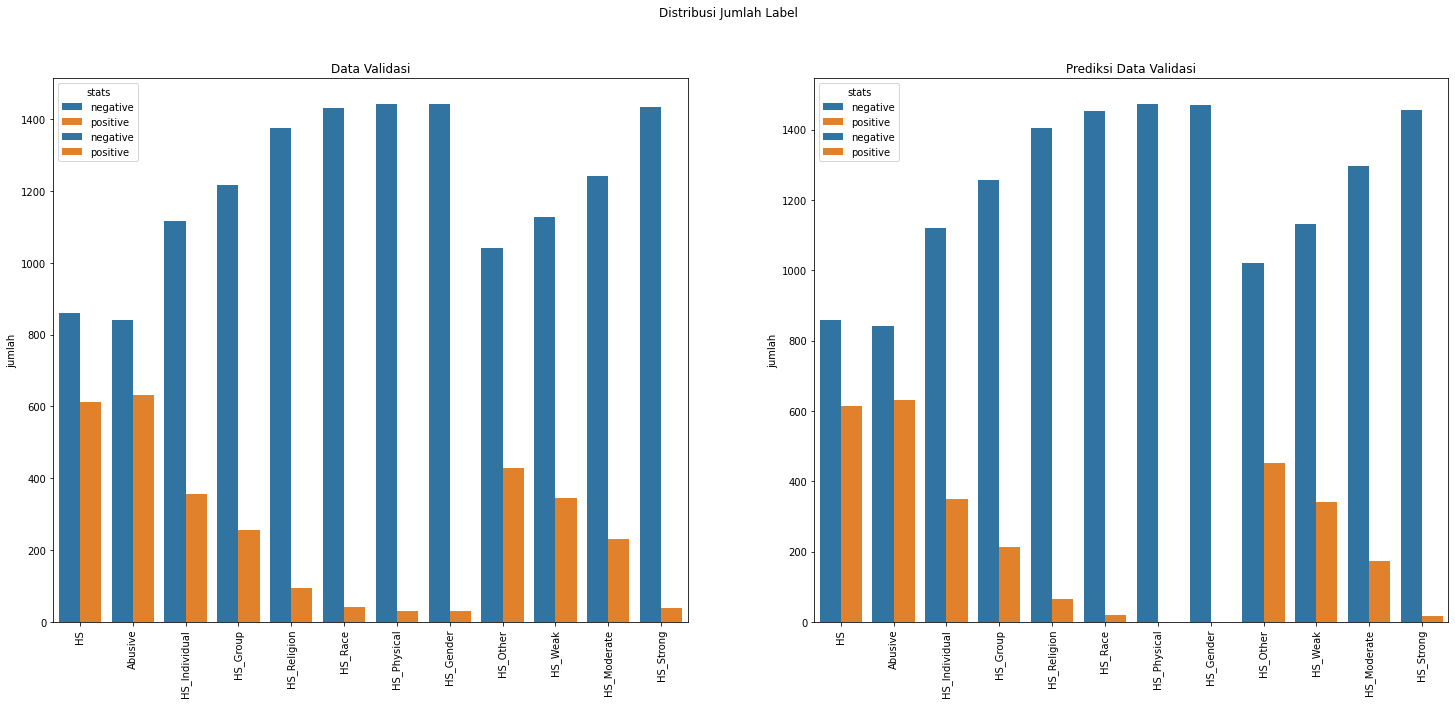

In [0]:
plt.figure(figsize=(25,10))
plt.suptitle('Distribusi Jumlah Label')

plt.subplot(1,2,1)
sns.barplot(x="label", y="jumlah",hue="stats", data=dat_anls_val).set_xticklabels(sns.barplot(x="label", y="jumlah",hue="stats", data=dat_anls_val).get_xticklabels(),rotation=90)
plt.title("Data Validasi")
plt.xlabel('')

plt.subplot(1,2,2)
sns.barplot(x="label", y="jumlah",hue="stats", data=dat_anls_val_predict).set_xticklabels(sns.barplot(x="label", y="jumlah",hue="stats", data=dat_anls_val_predict).get_xticklabels(),rotation=90)
plt.title("Prediksi Data Validasi")
plt.xlabel('')

plt.show()

In [0]:
pd.DataFrame({
    "label" : data_val.columns[1:],
    "negative (true)" : dat_anls_val[dat_anls_val['stats'] == "negative"]["jumlah"].values,
    "positive (true)" : dat_anls_val[dat_anls_val['stats'] == "positive"]["jumlah"].values,
    "negative (predict)" : dat_anls_val_predict[dat_anls_val_predict['stats'] == "negative"]["jumlah"].values,
    "positive (predict)" : dat_anls_val_predict[dat_anls_val_predict['stats'] == "positive"]["jumlah"].values
})

,label,negative (true),positive (true),negative (predict),positive (predict)
0,HS,859,613,858,614
1,Abusive,840,632,842,630
2,HS_Individual,1115,357,1121,351
3,HS_Group,1216,256,1258,214
4,HS_Religion,1376,96,1406,66
5,HS_Race,1431,41,1452,20
6,HS_Physical,1441,31,1472,0
7,HS_Gender,1441,31,1471,1
8,HS_Other,1042,430,1021,451
9,HS_Weak,1128,344,1132,340


### OOV Check

In [0]:
def generate_ngrams(s):
    
    # Break sentence in the token, remove empty tokens
    tokens = [token for token in s.str.split(" ") if token != ""]
    
    # Use the zip function to help us generate n-grams
    # Concatentate the tokens into ngrams and return
    ngrams = np.concatenate(tokens)
    return ngrams

def oov(fitur,token):
    outOfVocab = []
    for i in token:
        if i not in fitur:
            outOfVocab.append(i)
    return outOfVocab

def oov_count(oovList):
    oovCount = {}
    for i in oovList:
        if i in oovCount.keys():
            oovCount[i] = oovCount[i]+1
        else:
            oovCount[i] = 1
    return oovCount

In [0]:
join_data_val = data_val.join(data_val_predict.drop(['Tweet_Parsed'],axis=1),rsuffix="_predict")

In [0]:
miss_exact_tweet_val = join_data_val[(join_data_val["HS"]!=join_data_val["HS_predict"]) | (join_data_val["Abusive"] != join_data_val["Abusive_predict"]) | (join_data_val["HS_Individual"] != join_data_val["HS_Individual_predict"]) | (join_data_val["HS_Group"] != join_data_val["HS_Group_predict"]) | (join_data_val["HS_Religion"] != join_data_val["HS_Religion_predict"]) | (join_data_val["HS_Race"] != join_data_val["HS_Race"]) | (join_data_val["HS_Physical"] != join_data_val["HS_Physical_predict"]) | (join_data_val["HS_Gender"] != join_data_val["HS_Gender_predict"]) | (join_data_val["HS_Other"] != join_data_val["HS_Other_predict"]) | (join_data_val["HS_Weak_predict"] != join_data_val["HS_Weak_predict"]) | (join_data_val["HS_Moderate_predict"] != join_data_val["HS_Moderate_predict"]) | (join_data_val["HS_Strong_predict"] != join_data_val["HS_Strong_predict"])]

In [0]:
vocab = tokenizer.ids_to_tokens.values()

In [0]:
tokenizer.ids_to_tokens.values()

odict_values(['[PAD]', '[unused1]', '[unused2]', '[unused3]', '[unused4]', '[unused5]', '[unused6]', '[unused7]', '[unused8]', '[unused9]', '[unused10]', '[unused11]', '[unused12]', '[unused13]', '[unused14]', '[unused15]', '[unused16]', '[unused17]', '[unused18]', '[unused19]', '[unused20]', '[unused21]', '[unused22]', '[unused23]', '[unused24]', '[unused25]', '[unused26]', '[unused27]', '[unused28]', '[unused29]', '[unused30]', '[unused31]', '[unused32]', '[unused33]', '[unused34]', '[unused35]', '[unused36]', '[unused37]', '[unused38]', '[unused39]', '[unused40]', '[unused41]', '[unused42]', '[unused43]', '[unused44]', '[unused45]', '[unused46]', '[unused47]', '[unused48]', '[unused49]', '[unused50]', '[unused51]', '[unused52]', '[unused53]', '[unused54]', '[unused55]', '[unused56]', '[unused57]', '[unused58]', '[unused59]', '[unused60]', '[unused61]', '[unused62]', '[unused63]', '[unused64]', '[unused65]', '[unused66]', '[unused67]', '[unused68]', '[unused69]', '[unused70]', '[unus

In [0]:
oov_val = oov(vocab, generate_ngrams(miss_exact_tweet_val['Tweet_Parsed']))
oov_val_count = oov_count(oov_val)

In [0]:
oov_val_count

{'berengsek': 13,
 'rt': 35,
 'bajingan': 8,
 'urusannya': 1,
 'monyet': 10,
 'dipukuli': 1,
 '': 935,
 'celeng': 1,
 'buat': 32,
 'synna': 1,
 'emosi': 1,
 'jangan': 27,
 'mancing': 1,
 'malaysia': 49,
 'infinit': 1,
 'tunggu': 2,
 'timnas': 3,
 'shame': 30,
 'angkat': 1,
 'banyuwangi': 1,
 'kunci': 1,
 'kesuksesan': 1,
 'bec': 1,
 'bacot': 7,
 'kalian': 20,
 'baca': 8,
 'hadisnya': 1,
 'pensyariatan': 1,
 'puasa': 2,
 'asyura': 1,
 'akikah': 1,
 'ittiba': 2,
 'ikuti': 1,
 'yahudi': 13,
 'sahabat': 2,
 'sunnah': 1,
 'nabi': 3,
 'gamis': 1,
 'hukumnya': 1,
 'mubah': 1,
 'sarung': 1,
 'peci': 1,
 'bodoh': 10,
 'berpengaruh': 1,
 'keleees': 1,
 'lihat': 10,
 'polling': 2,
 'diganti': 1,
 'ganti': 19,
 'ogah': 1,
 'sendu': 1,
 'gila': 15,
 'menonton': 4,
 'tuan': 4,
 'bajang': 4,
 'mengkritik': 1,
 'itulah': 2,
 'santun': 1,
 'menyakiti': 1,
 'ingat': 8,
 'demokrasi': 8,
 'indonesia': 120,
 'komunis': 35,
 'maksudkan': 1,
 'kucing': 1,
 'joke': 4,
 'laughing': 2,
 'bosan': 1,
 'bergaya': 

In [0]:
print("number of OOV words : ", len(oov_val))
print("number of unique OOV words : ", len(oov_val_count))

number of OOV words :  5418
number of unique OOV words :  2101


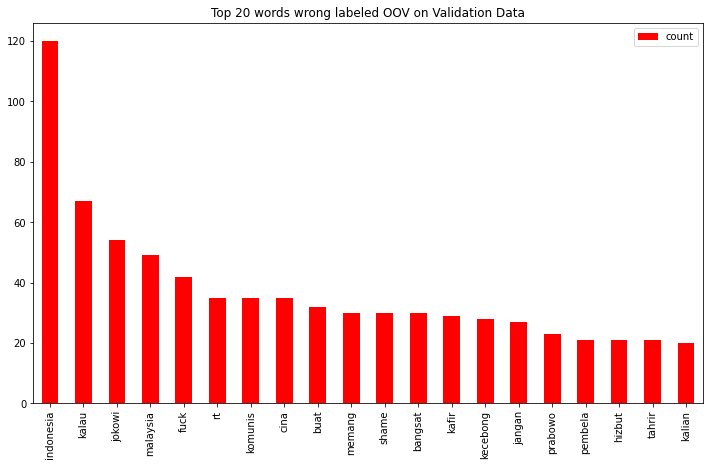

In [0]:
df_oov_val = pd.DataFrame(oov_val_count.items(),columns=["Tweet","count"])
df_oov_val.sort_values(['count'],ascending=False)[1:21].plot(
    kind='bar', y='count',x='Tweet', color='red', title='Top 20 words wrong labeled OOV on Validation Data', figsize=(12,7))
plt.xlabel("")
plt.show()

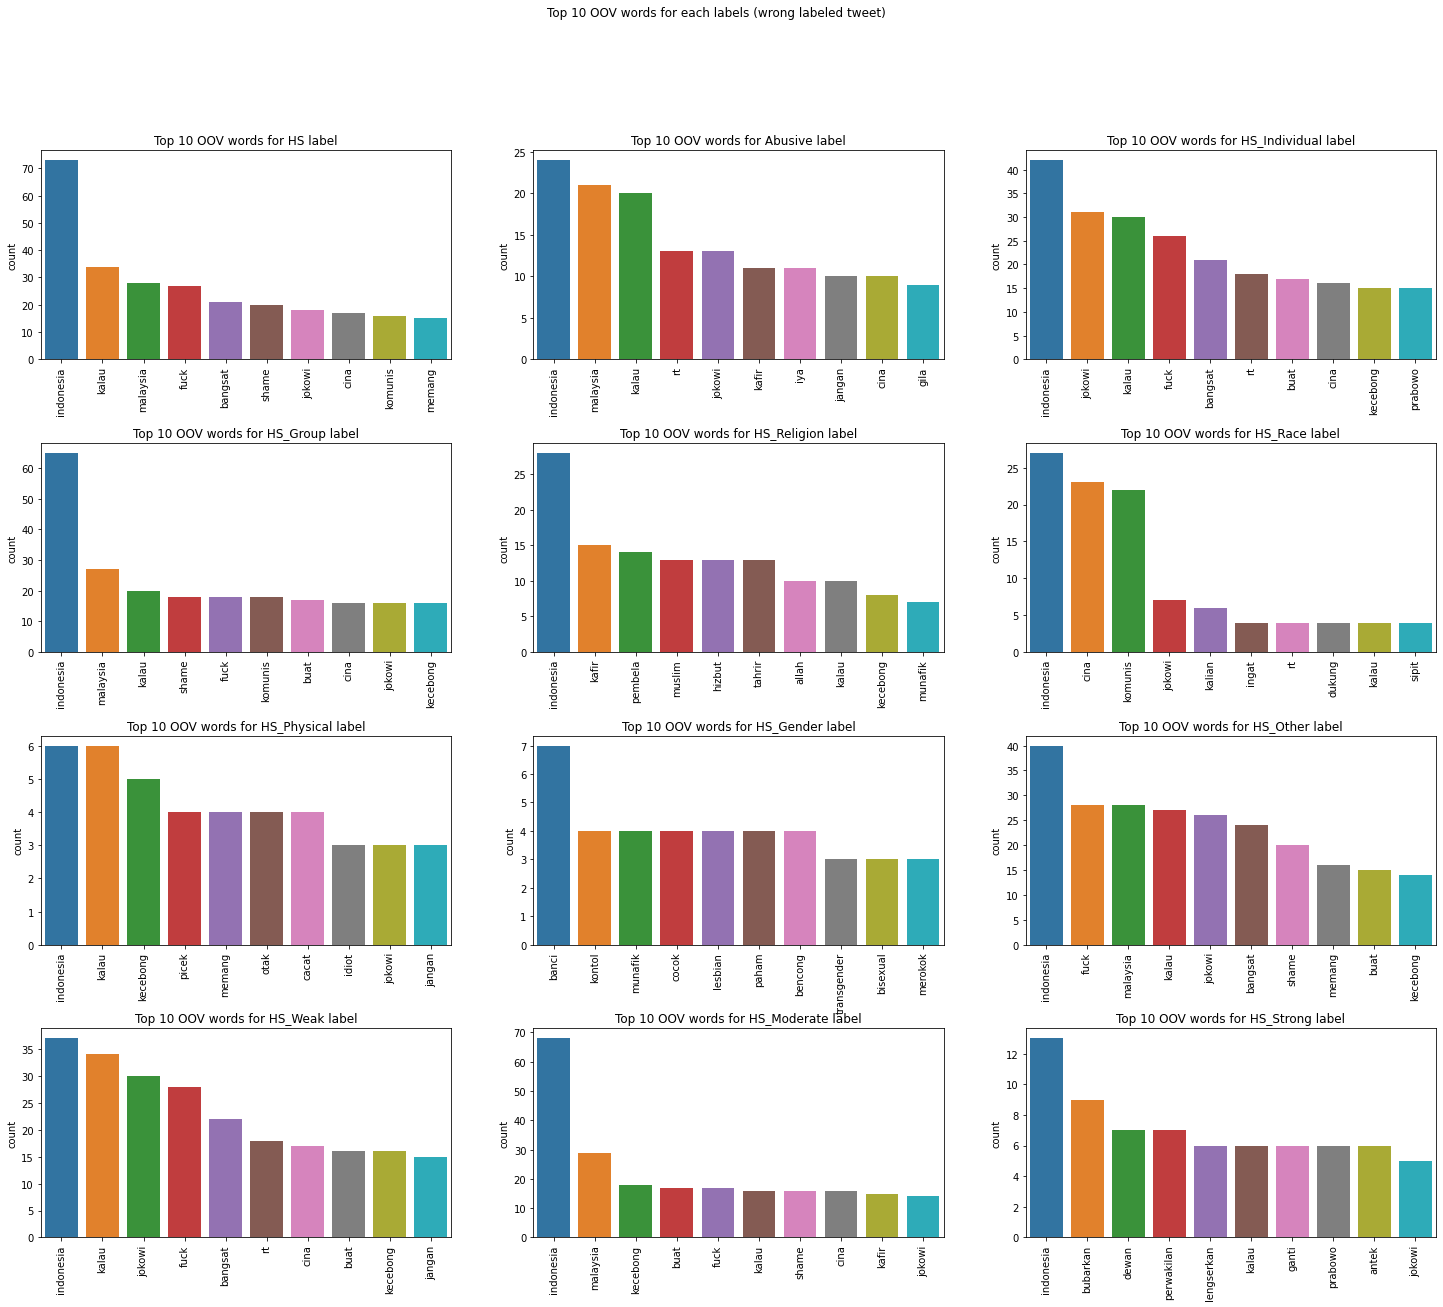

In [0]:

plt.figure(figsize=(25,20))
plt.suptitle('Top 10 OOV words for each labels (wrong labeled tweet)')
for i in range (len(target)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust(hspace=0.4)
    wrongtweet = join_data_val[join_data_val[target[i]]!=join_data_val[target[i]+str("_predict")]]
    wrongtoken = generate_ngrams(wrongtweet['Tweet_Parsed']).tolist()
    wrong_oov = oov(vocab, wrongtoken)
    wrong_oov_count = oov_count(wrong_oov)
    frame = pd.DataFrame(wrong_oov_count.items(),columns=["Tweet","count"])
    frame = frame.sort_values(['count'],ascending=False)[1:11]
    sns.barplot(x="Tweet", y="count", data=frame).set_xticklabels(sns.barplot(x="Tweet", y="count", data=frame).get_xticklabels(),rotation=90)
    title='Top 10 OOV words for '+str(target[i])+" label"
    plt.title(title)
    plt.xlabel("")

### Tweet Check

In [0]:
miss_exact_tweet_val['Tweet_Parsed'].values.tolist()

['so much berengsek people in the world',
 'rt user dasar bajingan url',
 'rt user tidak ada urusannya monyet aku broken home tidak begitu begitu amat malah dipukuli sama teman teman aku  kaya raya tidak ada tidak ada h ',
 'user user aku lagi celeng tidak buat synna emosi jangan mancing  ',
 'malaysia being defeated infinit  tunggu timnas day shame on you malaysia',
 'angkat tradisi dan budaya rakyat banyuwangi kunci kesuksesan bec ',
 'user user bacot  kalian ',
 'user user baca lagi hadisnya  benar pensyariatan puasa asyura akikah bukan karena ittiba ikuti ajaran yahudi dan adat arab tapi karena para sahabat ittiba sunnah nabi gamis itu hukumnya mubah seperti sarung peci koko tidak a',
 'user mau naik apa seperti bodoh amat tidak berpengaruh keleees lihat polling google meminta presiden  diganti apa apa apa ganti presiden pak ogah ganti presiden',
 'sendu gila rasa ',
 'user user user pernah menonton bagaimana tuan guru bajang mengkritik presiden di acara hari pers nasional itulah c

In [0]:
miss_exact_tweet_val.iloc[:,1:-12].columns

Index(['HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race',
       'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate',
       'HS_Strong'],
      dtype='object')

In [0]:
miss_exact_tweet_val.iloc[:,1:-12].values.tolist()

[[1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0],
 [1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 1, 0, 1, 0, 0, 0, 0,

In [0]:
miss_exact_tweet_val.iloc[:,-12:].values.tolist()

[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0],
 [1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0

## Data Test Predict Analysis

In [0]:
data_test_predict = pd.DataFrame(data=data_test['Tweet'],columns=['Tweet']).reset_index(drop=True).join(pd.DataFrame(data=pred_test, columns=target)).join(pd.DataFrame(data=data_test['Tweet_Parsed'],columns=['Tweet_Parsed']).reset_index(drop=True))

### Check Number of Labels on Predict Data

In [0]:
label_size0_test = []
label_size1_test = []

for i in data_test.columns[2:-1]:
    label_size0_test.append(len(data_test[data_test[i]==0]))
    label_size1_test.append(len(data_test[data_test[i]==1]))

label_size0_test_predict = []
label_size1_test_predict = []

for i in data_test_predict.columns[1:-1]:
    label_size0_test_predict.append(len(data_test_predict[data_test_predict[i]==0]))
    label_size1_test_predict.append(len(data_test_predict[data_test_predict[i]==1]))

In [0]:
dat_anls_test = pd.DataFrame({
    'label' : data_test.columns[2:-1],
    'stats' : ["negative" for i in range(len(data_test.columns[2:-1]))],
    'jumlah' : label_size0_test
}).append(
    pd.DataFrame({
        'label' : data_test.columns[2:-1],
        'stats' : ["positive" for i in range(len(data_test.columns[2:-1]))],
        'jumlah' : label_size1_test
    })
)

# dat_anls_test = dat_anls_test.set_index(['label'], drop=True)

dat_anls_test_predict = pd.DataFrame({
    'label' : data_test_predict.columns[1:-1],
    'stats' : ["negative" for i in range(len(data_test_predict.columns[1:-1]))],
    'jumlah' : label_size0_test_predict
}).append(
    pd.DataFrame({
        'label' : data_test_predict.columns[1:-1],
        'stats' : ["positive" for i in range(len(data_test_predict.columns[1:-1]))],
        'jumlah' : label_size1_test_predict
    })
)

# dat_anls_test_predict = dat_anls_test_predict.set_index(['label'], drop=True)

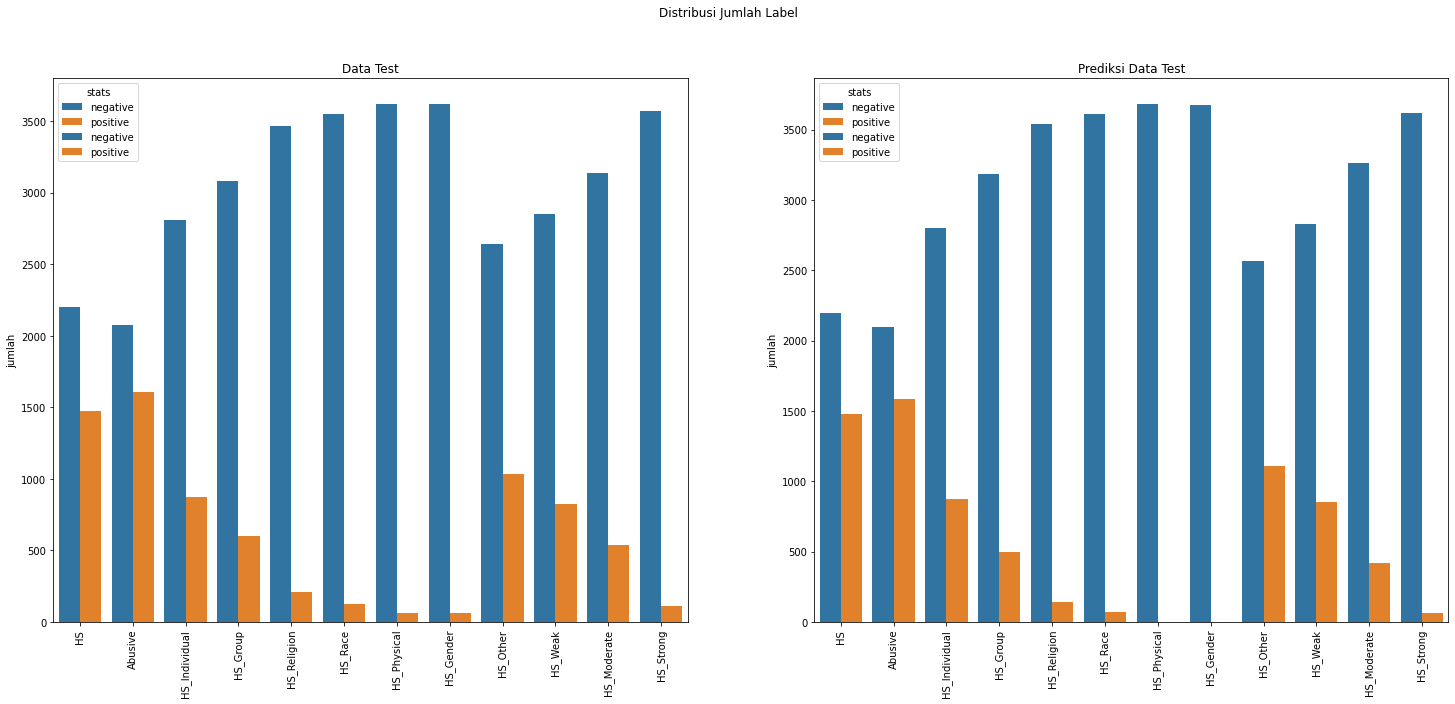

In [0]:
plt.figure(figsize=(25,10))
plt.suptitle('Distribusi Jumlah Label')

plt.subplot(1,2,1)
sns.barplot(x="label", y="jumlah",hue="stats", data=dat_anls_test).set_xticklabels(sns.barplot(x="label", y="jumlah",hue="stats", data=dat_anls_test).get_xticklabels(),rotation=90)
plt.title("Data Test")
plt.xlabel('')

plt.subplot(1,2,2)
sns.barplot(x="label", y="jumlah",hue="stats", data=dat_anls_test_predict).set_xticklabels(sns.barplot(x="label", y="jumlah",hue="stats", data=dat_anls_test_predict).get_xticklabels(),rotation=90)
plt.title("Prediksi Data Test")
plt.xlabel('')

plt.show()

In [0]:
pd.DataFrame({
    "label" : data_test.columns[2:-1],
    "negative (true)" : dat_anls_test[dat_anls_test['stats'] == "negative"]["jumlah"].values,
    "positive (true)" : dat_anls_test[dat_anls_test['stats'] == "positive"]["jumlah"].values,
    "negative (predict)" : dat_anls_test_predict[dat_anls_test_predict['stats'] == "negative"]["jumlah"].values,
    "positive (predict)" : dat_anls_test_predict[dat_anls_test_predict['stats'] == "positive"]["jumlah"].values
})

,label,negative (true),positive (true),negative (predict),positive (predict)
0,HS,2204,1476,2200,1480
1,Abusive,2075,1605,2097,1583
2,HS_Individual,2806,874,2802,878
3,HS_Group,3078,602,3185,495
4,HS_Religion,3467,213,3540,140
5,HS_Race,3551,129,3608,72
6,HS_Physical,3617,63,3680,0
7,HS_Gender,3616,64,3678,2
8,HS_Other,2643,1037,2568,1112
9,HS_Weak,2854,826,2827,853


### OOV Check

In [0]:
join_data_test = data_test.join(data_test_predict.drop(['Tweet','Tweet_Parsed'],axis=1),rsuffix="_predict")

In [0]:
miss_exact_tweet_test = join_data_test[(join_data_test["HS"]!=join_data_test["HS_predict"]) | (join_data_test["Abusive"] != join_data_test["Abusive_predict"]) | (join_data_test["HS_Individual"] != join_data_test["HS_Individual_predict"]) | (join_data_test["HS_Group"] != join_data_test["HS_Group_predict"]) | (join_data_test["HS_Religion"] != join_data_test["HS_Religion_predict"]) | (join_data_test["HS_Race"] != join_data_test["HS_Race_predict"]) | (join_data_test["HS_Physical"] != join_data_test["HS_Physical_predict"]) | (join_data_test["HS_Gender"] != join_data_test["HS_Gender_predict"]) | (join_data_test["HS_Other"] != join_data_test["HS_Other_predict"]) | (join_data_test["HS_Weak"] != join_data_test["HS_Weak_predict"]) | (join_data_test["HS_Moderate"] != join_data_test["HS_Moderate_predict"]) | (join_data_test["HS_Strong"] != join_data_test["HS_Strong_predict"])]

In [0]:
oov_test = oov(vocab, generate_ngrams(miss_exact_tweet_test['Tweet_Parsed']))
oov_test_count = oov_count(oov_test)

In [0]:
oov_test_count

{'ganteng': 7,
 'berengsek': 27,
 'buat': 74,
 '': 2390,
 'partaimu': 1,
 'demokrasi': 7,
 'indonesia': 246,
 'perjuangan': 5,
 'bajingan': 18,
 'mengajarkan': 4,
 'garong': 1,
 'kafir': 91,
 'pecun': 8,
 'hobi': 1,
 'zina': 1,
 'siap': 8,
 'berjilid': 3,
 'jilid': 3,
 'bani': 23,
 'cingkrang': 3,
 'malaysia': 110,
 'memberlakukan': 1,
 'syariat': 4,
 'melegalkan': 1,
 'perjudian': 1,
 'syarat': 1,
 'ketentuan': 1,
 'hamdalah': 1,
 'fitur': 1,
 'keparat': 5,
 'wired': 1,
 'drinker': 1,
 'yue': 1,
 'excuse': 2,
 'kiki': 1,
 'cabean': 5,
 'charlotte': 1,
 'ronan': 1,
 'siapa': 30,
 'kriteria': 1,
 'kelemahan': 1,
 'gerindra': 3,
 'prabowo': 102,
 'elektabilitasnya': 1,
 'congor': 9,
 'fadli': 3,
 'durno': 1,
 'suffocating': 1,
 'kampungan': 32,
 'menonton': 11,
 'sampah': 15,
 'astaga': 4,
 'sewa': 2,
 'sekalian': 5,
 'pantas': 7,
 'idiot': 20,
 'makanannya': 1,
 'upil': 1,
 'beli': 9,
 'pengiriman': 1,
 'cina': 96,
 'paket': 1,
 'kenapa': 55,
 'seminggu': 2,
 'pork': 1,
 'najis': 25,
 '

In [0]:
print("number of OOV words : ", len(oov_test))
print("number of unique OOV words : ", len(oov_test_count))

number of OOV words :  13758
number of unique OOV words :  4307


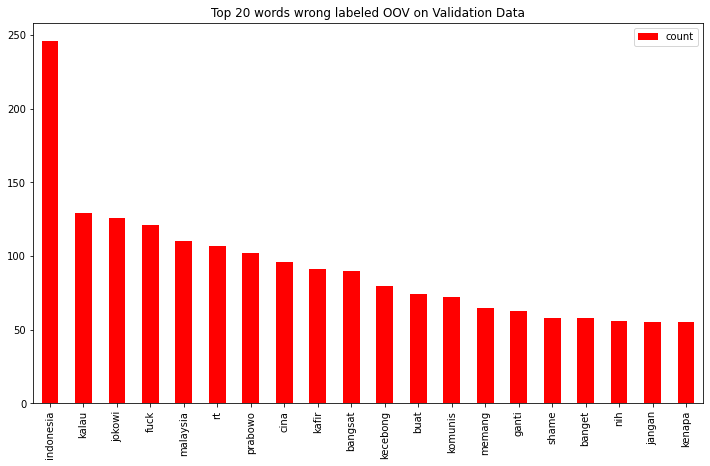

In [0]:
df_oov_test = pd.DataFrame(oov_test_count.items(),columns=["Tweet","count"])
df_oov_test.sort_values(['count'],ascending=False)[1:21].plot(
    kind='bar', y='count',x='Tweet', color='red', title='Top 20 words wrong labeled OOV on Validation Data', figsize=(12,7))
plt.xlabel("")
plt.show()

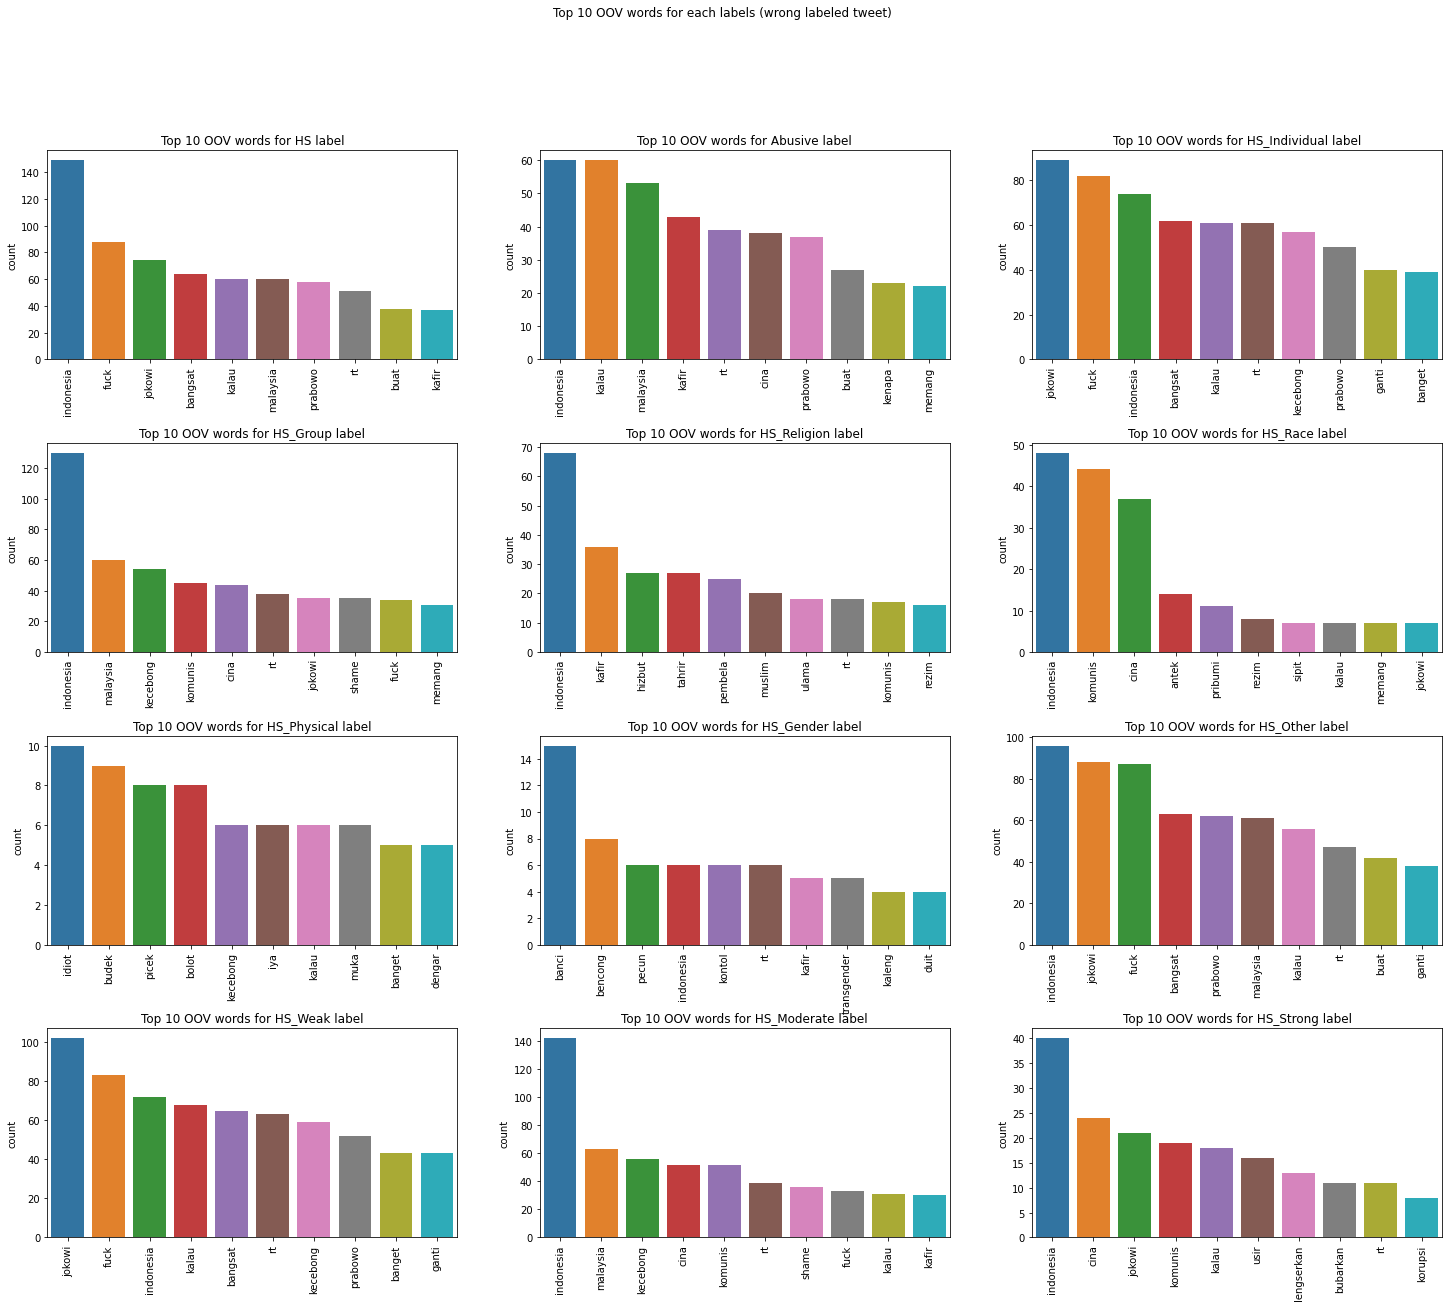

In [0]:
plt.figure(figsize=(25,20))
plt.suptitle('Top 10 OOV words for each labels (wrong labeled tweet)')
for i in range (len(target)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust(hspace=0.4)
    wrongtweet = join_data_test[join_data_test[target[i]]!=join_data_test[target[i]+str("_predict")]]
    wrongtoken = generate_ngrams(wrongtweet['Tweet_Parsed']).tolist()
    wrong_oov = oov(vocab, wrongtoken)
    wrong_oov_count = oov_count(wrong_oov)
    frame = pd.DataFrame(wrong_oov_count.items(),columns=["Tweet","count"])
    frame = frame.sort_values(['count'],ascending=False)[1:11]
    sns.barplot(x="Tweet", y="count", data=frame).set_xticklabels(sns.barplot(x="Tweet", y="count", data=frame).get_xticklabels(),rotation=90)
    title='Top 10 OOV words for '+str(target[i])+" label"
    plt.title(title)
    plt.xlabel("")

### Tweet Check

In [28]:
miss_exact_tweet_test['Tweet'].values.tolist()

["GANTENG TAPI BERENGSEK!!! BUAT APA?!!\nWHO DO YOU THINK YOU ARE? YOU'RE NOTHING!! TO ME! << REMEMBER THIS!!",
 "USER USER Karena partaimu pdip itu bajingan'",
 "USER Khan yg ngajarin si garong kafir'",
 "USER Anak pecun... ga jauh2 dr hobi zina.. haha'",
 'USER Udah siap di demo berjilid2 sama bani cingkrang ? Malaysia memberlakukan syariat Islam, tapi melegalkan perjudian dengan berbagai syarat dan ketentuan yg "strict".\'',
 "Hamdalah. Kelar juga ini fitur keparat.'",
 'Coffee really got me wired right now. A non coffee drinker',
 'Yue: i can excuse kiki and asheng becoming cabecabean but i drew a line in charlotte AND ronan having that sweet touch of a cabe',
 "USER Sebenernya siapa sih yang mempunyai hak untuk menyatakan bahwa orang itu kafir? Dan jika semua orang mempunyai hak, apa kriteria kafir itu?'",
 "USER Kelemahan gerindra itu ada di orang ini,...Prabowo turun elektabilitasnya karena CONGOR fadlizon spt DURNO'",
 'indonesia: literally suffocating from the air pollution\n\

In [0]:
miss_exact_tweet_test['Tweet_Parsed'].values.tolist()

['ganteng tapi berengsek buat apa who do you think you are you are nothing to me remember this ',
 'user user karena partaimu partai demokrasi indonesia perjuangan itu bajingan ',
 'user   mengajarkan  garong kafir ',
 'user anak pecun tidak jauh jauh dari hobi zina  ',
 'user sudah siap di demo berjilid jilid sama bani cingkrang malaysia memberlakukan syariat islam tapi melegalkan perjudian dengan berbagai syarat dan ketentuan  strict ',
 'hamdalah selesai juga ini fitur keparat ',
 'coffee really got me wired right now a non coffee drinker',
 'yue i can excuse kiki and asing becoming cabe cabean but i drew a line in charlotte and ronan having that sweet touch of a cabe',
 'user sebenarnya siapa   mempunyai hak untuk menyatakan bahwa orang itu kafir dan jika semua orang mempunyai hak apa kriteria kafir itu ',
 'user kelemahan gerindra itu ada di orang ini prabowo turun elektabilitasnya karena congor fadli zon seperti durno ',
 'indonesia literally suffocating from the air pollution th

In [29]:
miss_exact_tweet_test.iloc[:,2:-13].columns

Index(['HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race',
       'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate',
       'HS_Strong'],
      dtype='object')

In [30]:
# real label
miss_exact_tweet_test.iloc[:,2:-13].values.tolist()

[[1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1],
 [1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
 [1, 1, 1, 0, 0, 1, 0, 0,

In [0]:
miss_exact_tweet_test.iloc[:,-12:].values.tolist()

[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0

In [0]:
miss_exact_tweet_test.to_csv("/content/gdrive/My Drive/Colab Notebooks/Tugas Akhir/bestresult_Bert_nostemstop.csv",index=False,sep=";")